In [ ]:
pip install datapackage


https://datahub.io/machine-learning/dermatology#pandas

In [ ]:
import numpy as np
import datapackage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.externals._packaging.version import PrePostDevType
from sklearn.metrics import confusion_matrix
data_url = 'https://datahub.io/machine-learning/dermatology/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

     erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0         

In [ ]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Checked to see if there were null values

In [ ]:
dermDF= pd.DataFrame(data)

In [ ]:
print(dermDF.age.describe())

dermDF.corr()

count    358.000000
mean      36.296089
std       15.324557
min        0.000000
25%       25.000000
50%       35.000000
75%       49.750000
max       75.000000
Name: age, dtype: float64


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.005028,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.016006,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.138493,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.048053,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.081162,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.096953,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.371368,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.111047,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.078267,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,0.036412,-0.533208


AxesSubplot(0.125,0.125;0.775x0.755)


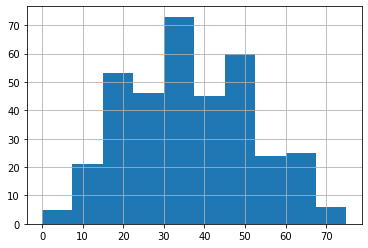

In [ ]:
print(dermDF.age.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


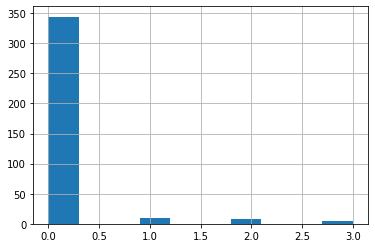

In [ ]:
print(dermDF.follicular_horn_plug.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


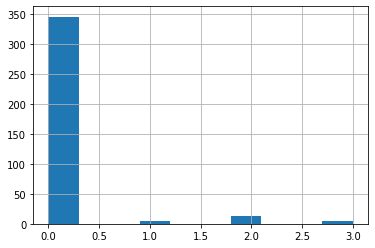

In [ ]:
print(dermDF.perifollicular_parakeratosis.hist())

In [ ]:
mean_age=dermDF['age'].mean()
print(dermDF.age.sort_values())

119    0.0
349    7.0
239    7.0
184    7.0
122    7.0
      ... 
36     NaN
262    NaN
263    NaN
264    NaN
265    NaN
Name: age, Length: 366, dtype: float64


In [ ]:
dermDF['age'].fillna(value=mean_age,inplace=True)
print(dermDF.age.sort_values())

119     0.0
349     7.0
239     7.0
184     7.0
122     7.0
       ... 
284    70.0
211    70.0
136    70.0
298    70.0
356    75.0
Name: age, Length: 366, dtype: float64


Age had null values. Looked at coorelations to see if there were any close coorelations to age so that I could better fill in the age values. I felt like there was a coorelation that I could use but no values had much coorelation so I settled on using the average age for the missing values.



https://realpython.com/pandas-sort-python/
https://www.geeksforgeeks.org/how-to-fill-nan-values-with-mean-in-pandas/
https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns

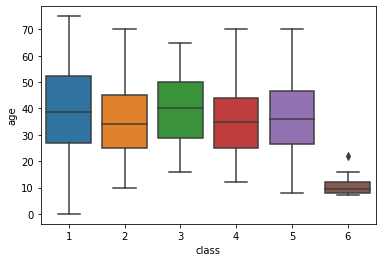

In [ ]:
sns.boxplot( x=dermDF["class"], y=dermDF["age"] )

Box plot of age vs. the 6 classes

In [ ]:
dermDF['disease1'] = np.where(dermDF['class']==1,1,0)
dermDF.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class,disease1
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55.0,2,0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8.0,1,1
2,2,1,2,3,1,3,0,3,0,0,...,2,3,2,0,0,2,3,26.0,3,0
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40.0,1,1
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45.0,3,0


Created disease 1 dataframe.

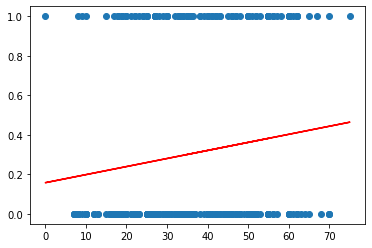

In [ ]:
X3 = dermDF.age.values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y3 = dermDF.disease1.values.reshape(-1,1)

LRmodel1 = LinearRegression()  

# Perform linear regression
LRmodel1.fit(X3, Y3)


# Make predictions
Y_pred3 = LRmodel1.predict(X3)  


# Visualize the dataset and the regression line:
plt.scatter(X3, Y3)
plt.plot(X3, Y_pred3, color='red')

plt.show()

Linear regression model with r2 and mse, each of which are understandably low.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y3, Y_pred3))
print("R2: ", r2_score(Y3, Y_pred3))
print(dermDF)

MSE:  0.208553477945778
R2:  0.017962960780911086
     erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0

In [ ]:
# Generating the Gaussian Naive Bayes model
select_dermDF = dermDF[["scalp_involvement","clubbing_of_the_rete_ridges","elongation_of_the_rete_ridges","thinning_of_the_suprapapillary_epidermis","munro_microabcess"]]
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = select_dermDF.iloc[:,0:4]
y = dermDF.iloc[:,35]
#9,10,19,20,21,23
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=50, shuffle=True, test_size=0.35, stratify=y)

# Display the sets
print(X_train)
print(X_test)

     scalp_involvement  clubbing_of_the_rete_ridges  \
200                  0                            0   
346                  0                            0   
7                    0                            0   
338                  0                            0   
218                  0                            0   
..                 ...                          ...   
212                  0                            0   
140                  0                            0   
159                  0                            0   
297                  0                            0   
50                   0                            0   

     elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  
200                              1                                         0  
346                              0                                         0  
7                                0                                         0  
338                    

Created a seperate dataframe for each of the attributes I wanted to look at.

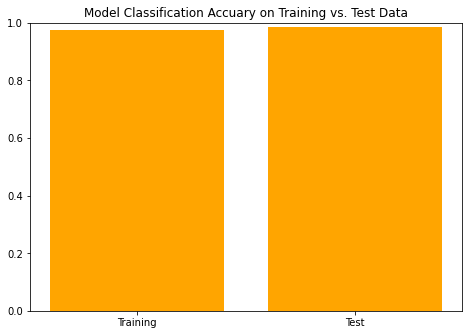

In [ ]:
import matplotlib.pyplot as plt

NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


Both accurate in training and test data.

[[89  1]
 [ 0 39]]


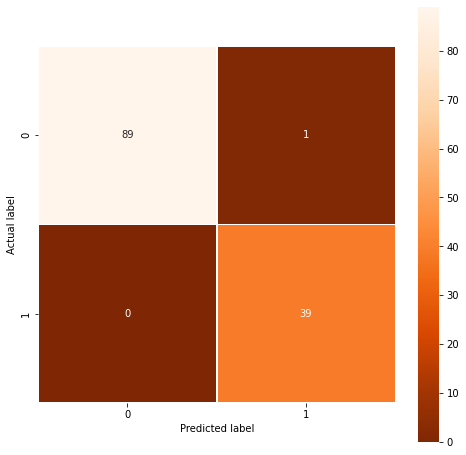

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.externals._packaging.version import PrePostDevType
from sklearn.metrics import confusion_matrix
import seaborn as sns
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)
def displayCM(z,xte,yte,xtr,ytr):
  pred = z.predict(xte)
  c5_cm = confusion_matrix(y_true=y_test, 
                        y_pred = pred)

  print(c5_cm)
  plt.figure(figsize=(8,8))
  sns.heatmap(c5_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')




displayCM(cart_classifier, X_test, y_test,X_train,y_train)

All data predictions were correct but one.

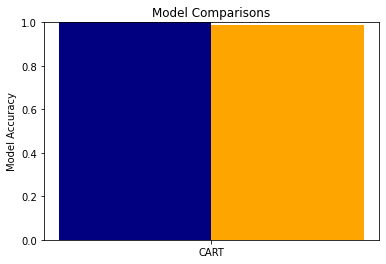

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



def compareModels(ca):

  # Record CART's classification accuracy on tarining and test datasets
  score1 = round(ca.score(X_train, y_train),2) # training score
  score2 = round(ca.score(X_test, y_test),2)   # testing score


  labels = ['CART']
  training_scores = [score1]
  testing_scores =  [score2]

  x = np.arange(1)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)

  plt.title('Model Comparisons')
  plt.show()
compareModels(cart_classifier)

Both sets were almost 100% accurate.

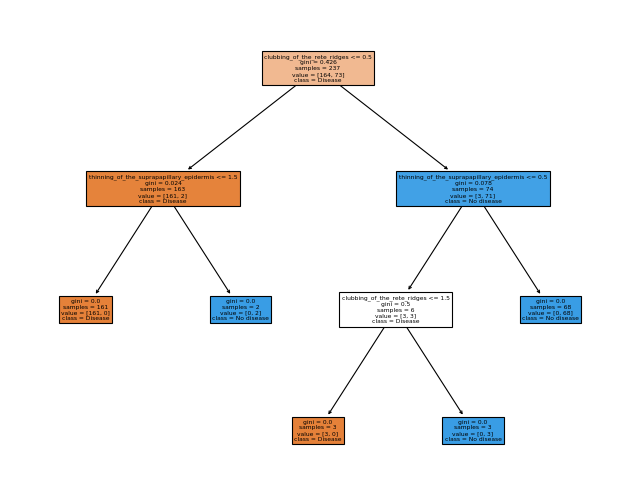

In [ ]:
def displayTree(z,x,w):
  z = DecisionTreeClassifier(criterion = w,  
                                         max_leaf_nodes=6,
                                         max_depth=5,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(10, 8), dpi=80)


# Plot the tree
  cn = ['Disease', 'No disease']
  tree.plot_tree(z, feature_names=x.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
  text_representation = tree.export_text(z, 
                                       feature_names=x.columns.values.tolist())
displayTree(cart_classifier, X,"gini")

The main 2 splits with the most influence was clubbing_of_the_rete_ridges and thinning_of_the_suprapapillary_epidermis

Fitting 4 folds for each of 180 candidates, totalling 720 fits


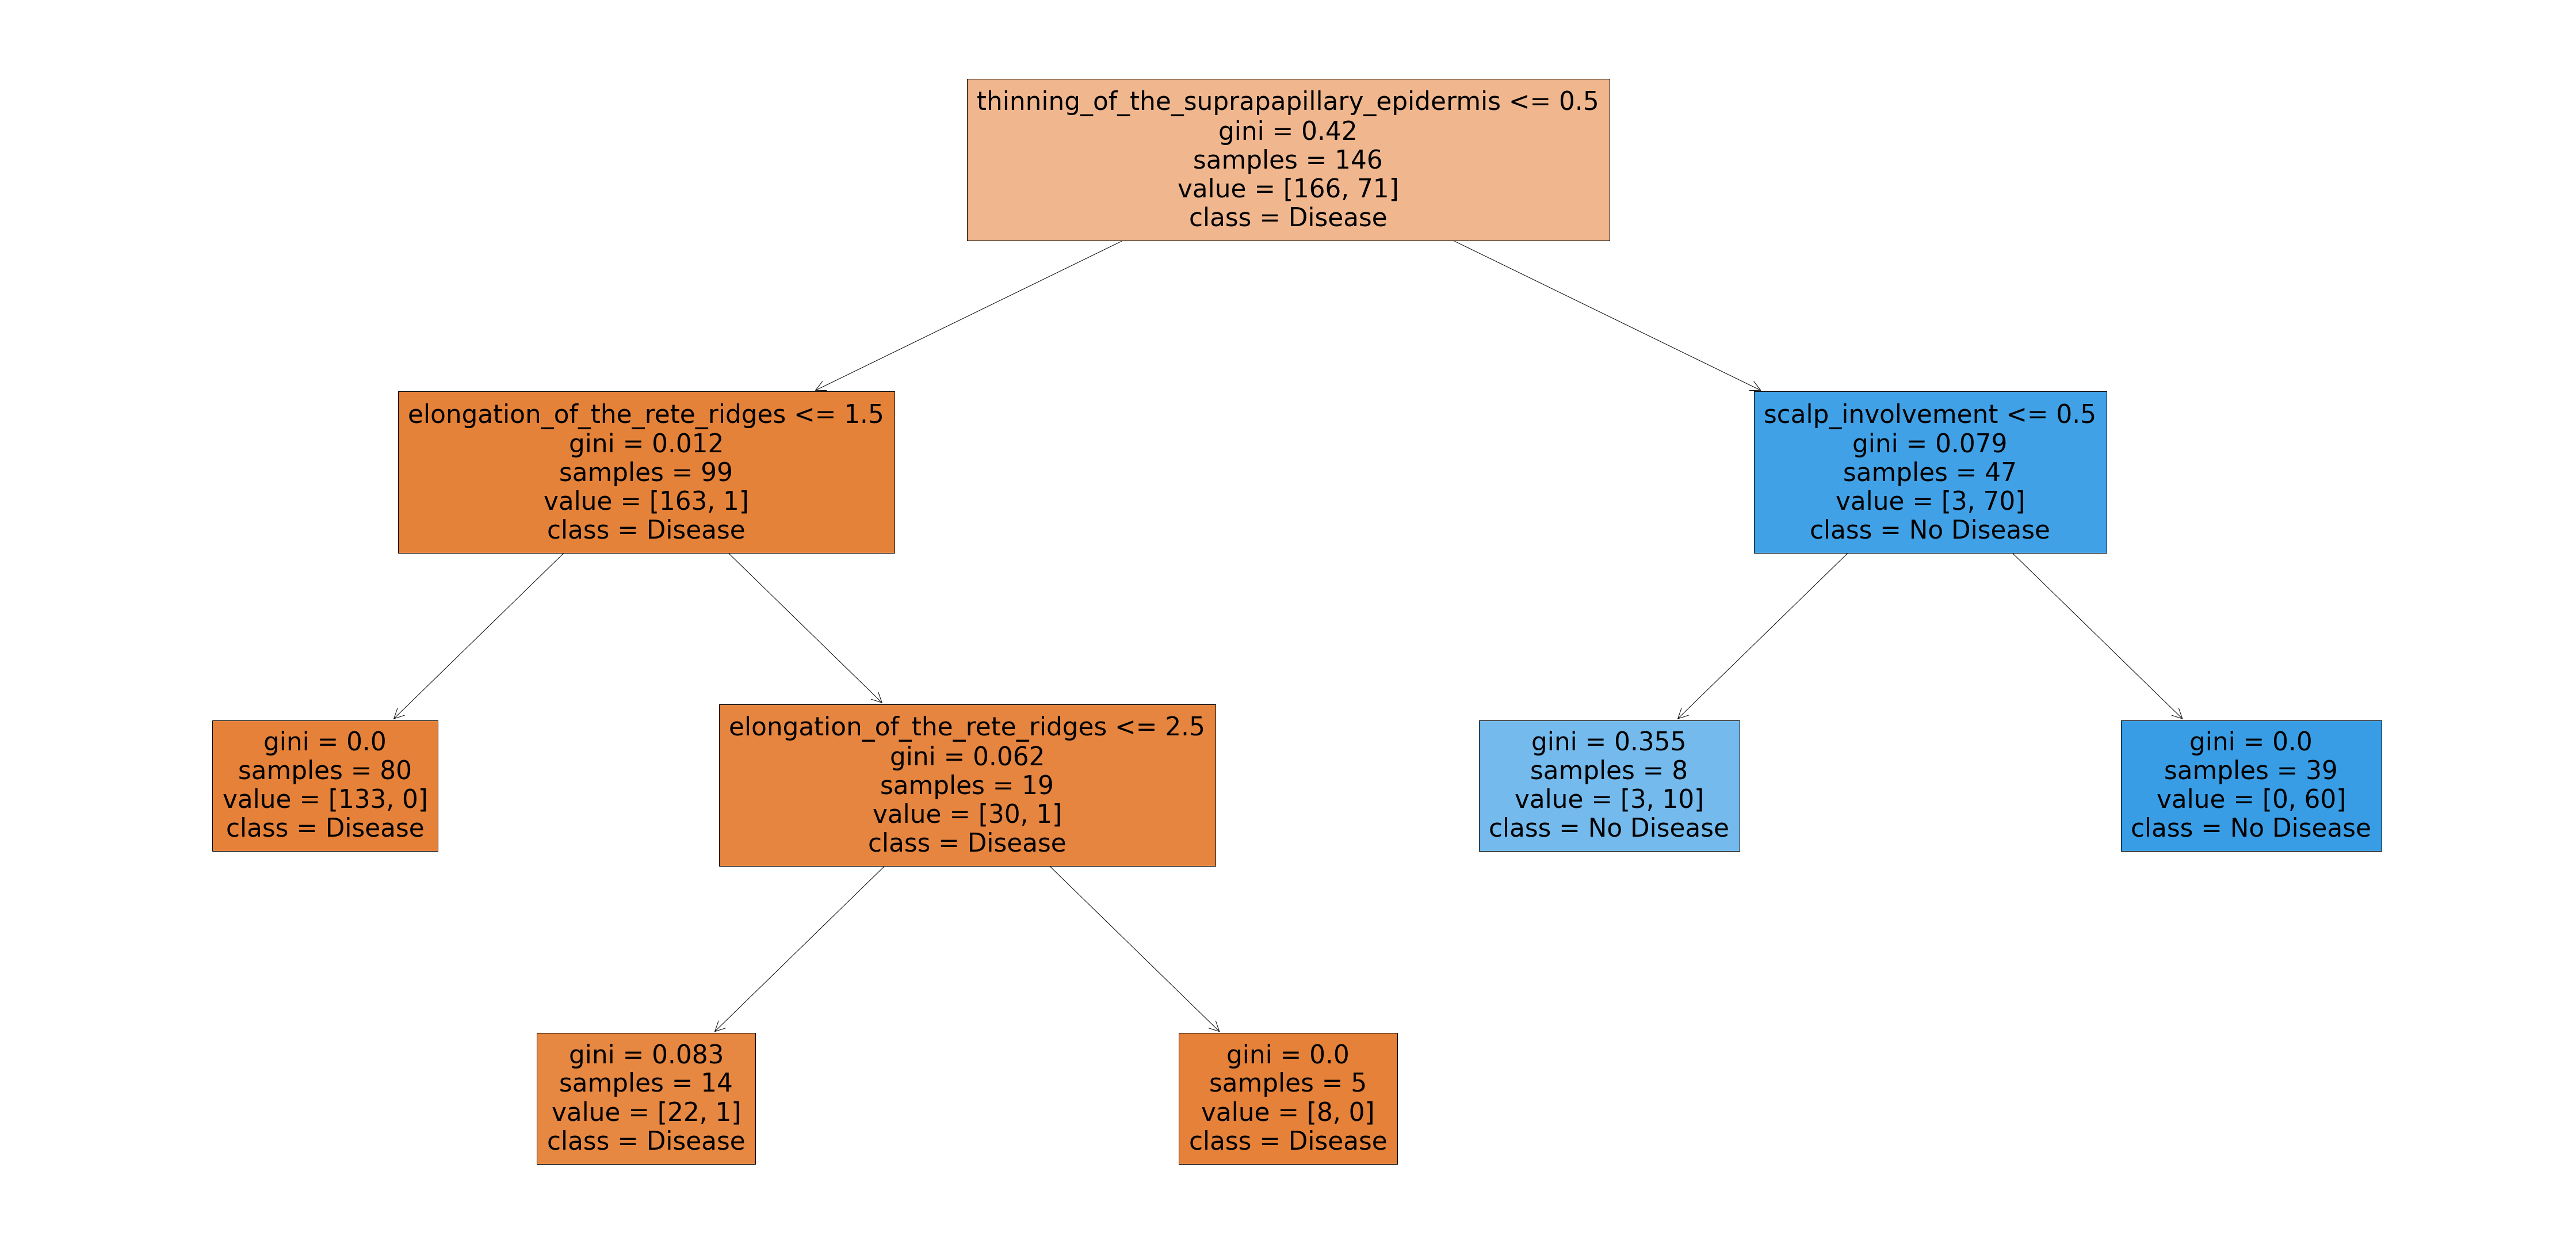

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100,
                                 max_leaf_nodes=16,
                                 n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred_rf = rnd_clf.predict(X_test)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)
rf_best = grid_search.best_estimator_
rf_best
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

This was similar to the decision tree with more influence from scalp_involvement.